In [2]:
import random
import numpy as np
import pandas as pd

In [4]:
df_e=pd.read_csv('economy.csv')
df_b=pd.read_csv('business.csv')

In [5]:
df=pd.concat([df_e,df_b],axis=0)

In [6]:
df.describe() # printing the statistical values of the dataset

,num_code
count,300261.000000
mean,1417.771709
std,1974.514439
min,101.000000
25%,637.000000
50%,818.000000
75%,927.000000
max,9991.000000


In [7]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

<AxesSubplot:>

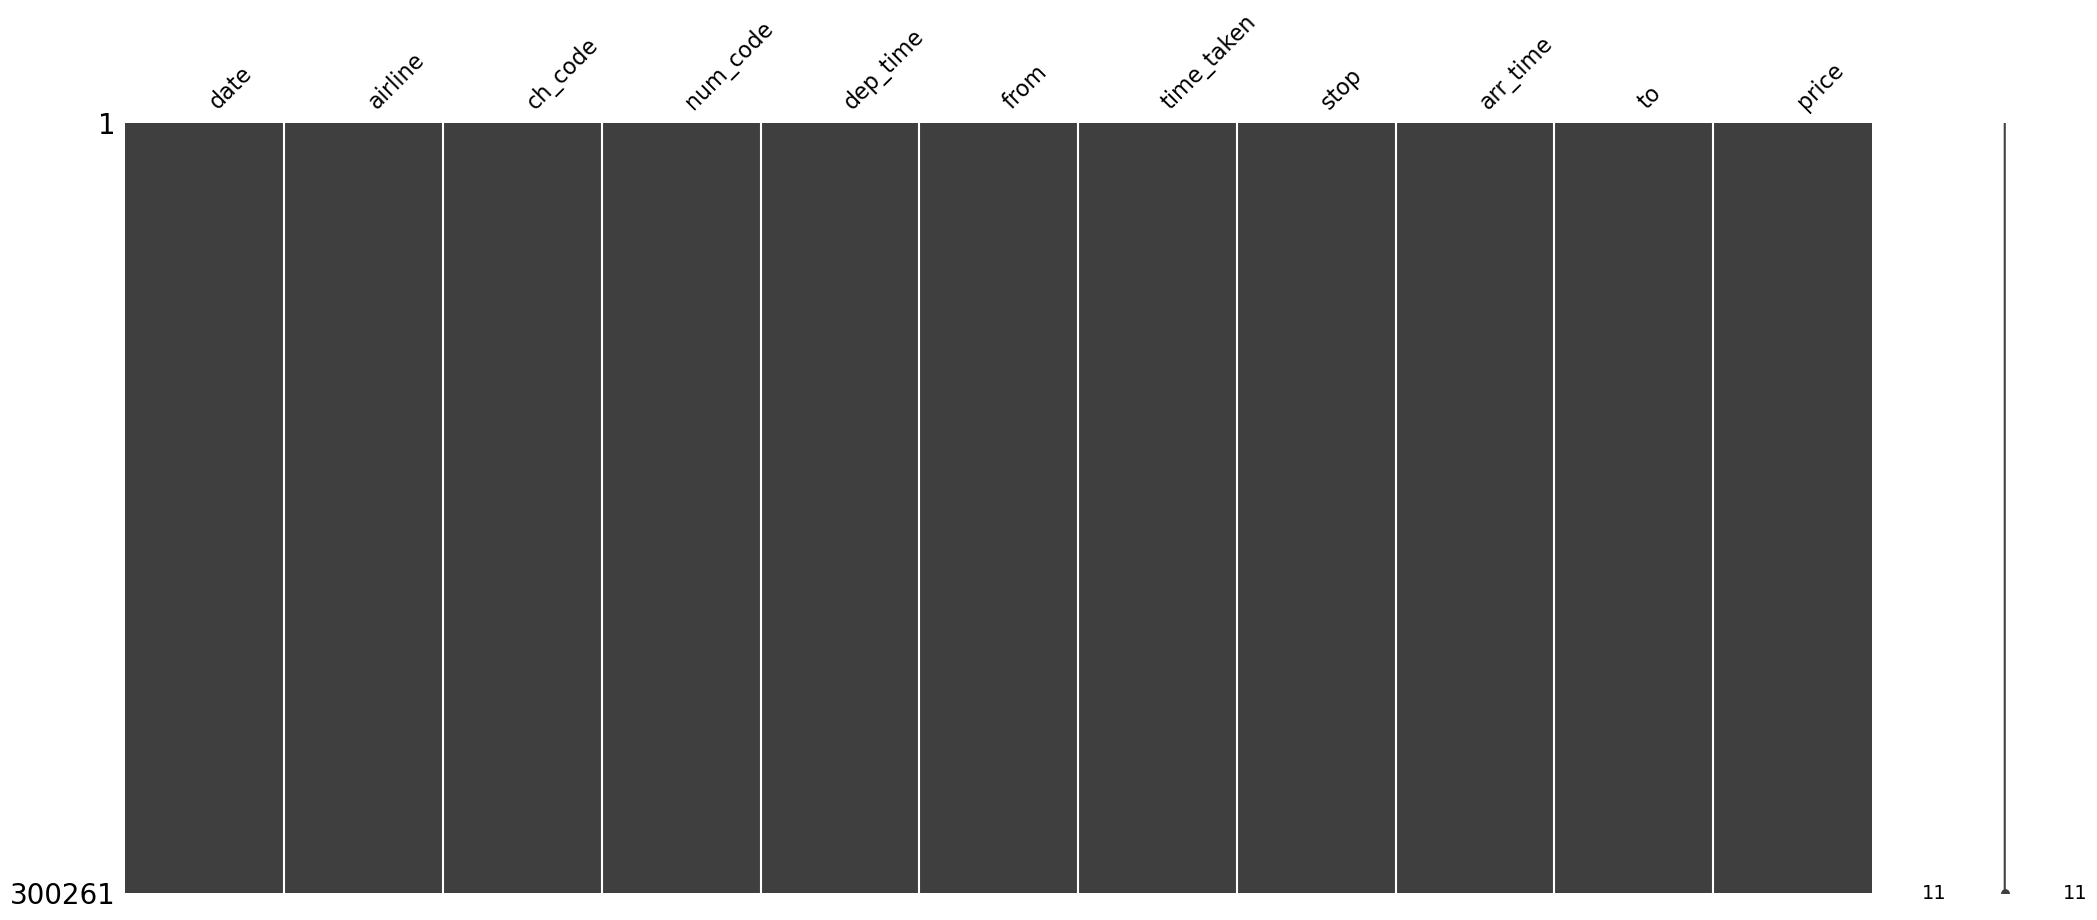

In [8]:
import missingno as mns # Visualizing the null values
mns.matrix(df)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# Select the column that contains unwanted characters
column_name = 'stop'

In [14]:
# Replace "\n" and "\t" with an empty string in the "text" column
df["stop"] = df["stop"].replace({"\n": "", "\t": ""})

In [15]:
# convert quantity column to integers
df['price'] = df['price'].str.replace(',', '')

In [16]:
df['price']=df['price'].astype(float)

In [17]:
df['date'] = pd.to_datetime(df['date'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-02-2022' in DD/MM/YYYY format. Provide format or specif

In [18]:
df['dep_time'] = pd.to_datetime(df['dep_time'])

In [19]:
df['arr_time'] = pd.to_datetime(df['arr_time'])

In [20]:
df.dtypes

date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time      datetime64[ns]
from                  object
time_taken            object
stop                  object
arr_time      datetime64[ns]
to                    object
price                float64
dtype: object

In [24]:
# Creating integer timestamp
new_date = pd.to_datetime(df['date']).astype('int64')/ 10**9
# convert datetime64[ns] column to float64
df['date'] = df['date'].astype('int64') * 1e-9

In [25]:
# Creating integer timestamp
new_deptime = pd.to_datetime(df['dep_time']).astype('int64')/ 10**9
# convert datetime64[ns] column to float64
df['dep_time'] = df['dep_time'].astype('int64') * 1e-9

In [26]:
# Creating integer timestamp
new_arrtime = pd.to_datetime(df['arr_time']).astype('int64')/ 10**9
# convert datetime64[ns] column to float64
df['arr_time'] = df['arr_time'].astype('int64') * 1e-9

In [29]:
df.duplicated().sum()

0

In [30]:
df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [28]:
# Data Visual

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='from', ylabel='price'>

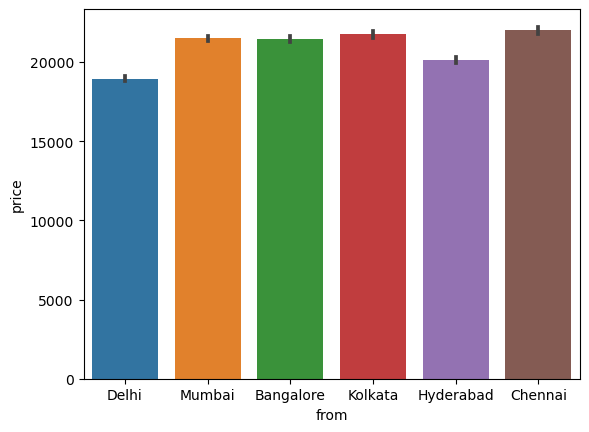

In [27]:
sns.barplot(x='from', y='price', data=df)

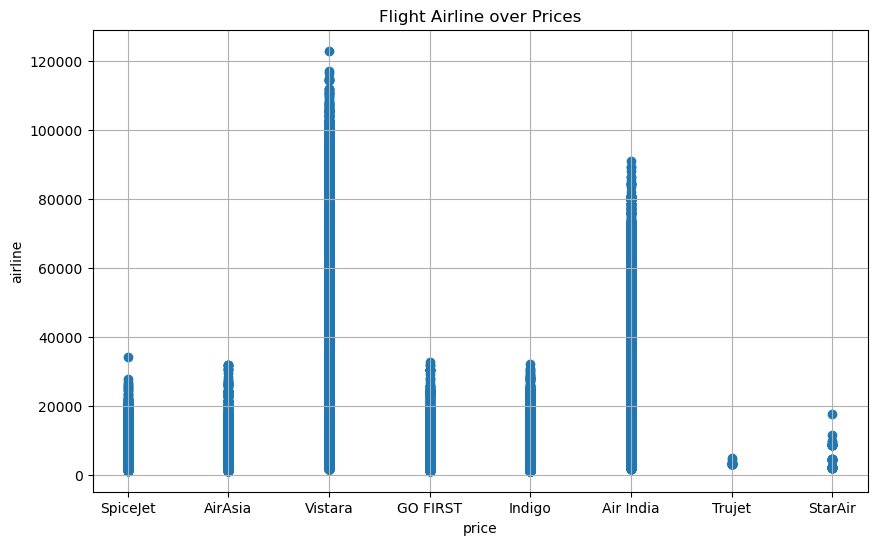

In [31]:
# Create the line plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['airline'], df['price'])
plt.title('Flight Airline over Prices')
plt.xlabel('price')
plt.ylabel('airline')
plt.grid(True)
plt.show()